In [ ]:
import numpy as np
import pandas as pd
import os
import random

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as  sns
import cv2 
import tensorflow 

from keras.preprocessing.image import ImageDataGenerator 
%matplotlib inline

In [ ]:
TrainingImagePath= '/content/drive/Othercomputers/My Laptop/dataset-crop-diseases/dataset-top-five-test-train/train'
TestingImagePath= '/content/drive/Othercomputers/My Laptop/dataset-crop-diseases/dataset-top-five-test-train/test'
ValidationImagePath= '/content/drive/Othercomputers/My Laptop/dataset-crop-diseases/dataset-top-five-test-train/val'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
# generating traning data
training_set= train_datagen.flow_from_directory(
    TrainingImagePath,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical')

# generating testing data
test_set= test_datagen.flow_from_directory(
    TestingImagePath,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical')

# generating validate data
valid_set= test_datagen.flow_from_directory(
    ValidationImagePath,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical')


Found 18044 images belonging to 23 classes.
Found 2599 images belonging to 23 classes.
Found 5149 images belonging to 23 classes.


In [ ]:
# def showImages(class_name):
#   random_index= random.choice(list(range(1,49)))
#   folder_path=os.path.join(TrainingImagePath,class_name)
#   try:
#     image_path=os.path.join(folder_path)
#     plt.imshow(mpimg.imread(image_path))
#   except:
#     image_path=os.path.join(folder_path,str(random_index).zfill(2)+'.jpg')
#     plt.imshow(mpimg.imread(image_path))
#   plt.title(class_name)
#   plt.axis(False)


In [ ]:
# plt.figure(figsize=(20,20))
# for labels , number in training_set.class_indices.items():
#   plt.subplot(6,6, number+1)
#   showImages(labels)




In [ ]:
test_set.class_indices

{'Corn_(maize)___healthy': 0,
 'Corn___Cercospora_leaf-spot Gray_Leaf_Spot': 1,
 'Corn___Common_Rust': 2,
 'Corn___Leaf_Blight': 3,
 'Cotton__bacterial_blight': 4,
 'Cotton__curl_virus': 5,
 'Cotton__fussarium_wilt': 6,
 'Cotton__healthy': 7,
 'Rice__Bacterial leaf blight': 8,
 'Rice__Brown spot': 9,
 'Rice__Leaf smut': 10,
 'Rice___Healthy': 11,
 'Rice___Hispa': 12,
 'Rice___Leaf_Blast': 13,
 'Sugarcane__Bacterial Blight': 14,
 'Sugarcane__Healthy': 15,
 'Sugarcane__RedRot': 16,
 'Sugarcane__RedRust': 17,
 'Wheat__Healthy': 18,
 'Wheat___Brown_Rust': 19,
 'Wheat___Yellow_Rust': 20,
 'Wheat__septoria': 21,
 'Wheat__stripe_rust': 22}

In [ ]:
TrainClasses= training_set.class_indices

ResultMap={}
for cropsDiseaseValue, cropDiseaseName in zip(TrainClasses.values(),TrainClasses.keys()):
  ResultMap[cropsDiseaseValue]= cropDiseaseName

import pickle
with open(R'/content/drive/MyDrive/Colab Notebooks/lvy pro/ResultMap.pkl','wb')as f:
  pickle.dump(ResultMap, f , pickle.HIGHEST_PROTOCOL)

print('Mapping of pace and its ID', ResultMap)

OutputNeurons=len(ResultMap)
print('\nThe number of output neurons--', OutputNeurons)


Mapping of pace and its ID {0: 'Corn_(maize)___healthy', 1: 'Corn___Cercospora_leaf-spot Gray_Leaf_Spot', 2: 'Corn___Common_Rust', 3: 'Corn___Leaf_Blight', 4: 'Cotton__bacterial_blight', 5: 'Cotton__curl_virus', 6: 'Cotton__fussarium_wilt', 7: 'Cotton__healthy', 8: 'Rice__Bacterial leaf blight', 9: 'Rice__Brown spot', 10: 'Rice__Leaf smut', 11: 'Rice___Healthy', 12: 'Rice___Hispa', 13: 'Rice___Leaf_Blast', 14: 'Sugarcane__Bacterial Blight', 15: 'Sugarcane__Healthy', 16: 'Sugarcane__RedRot', 17: 'Sugarcane__RedRust', 18: 'Wheat__Healthy', 19: 'Wheat___Brown_Rust', 20: 'Wheat___Yellow_Rust', 21: 'Wheat__septoria', 22: 'Wheat__stripe_rust'}

The number of output neurons-- 23


In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

classifier= Sequential()

classifier.add(Convolution2D(32,kernel_size=(3,3), strides=(1,1),input_shape=(128,128,3),activation='relu'))


classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(64,kernel_size=(3,3),strides=(1,1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(256,activation='relu'))

classifier.add(Dense(OutputNeurons,activation='softmax'))

classifier.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [ ]:

import time

StartTime=time.time()

model_history=classifier.fit_generator(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=7,
    validation_data=valid_set,
    validation_steps=len(valid_set),
    verbose=1
    )

EndTime= time.time()
print('///////////////////////// total time taken --', round((EndTime-StartTime)/60), ' minutes ///////')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/7
564/564 [==============================] - 5661s 10s/step - loss: 0.9483 - accuracy: 0.6986 - val_loss: 0.5438 - val_accuracy: 0.8186
Epoch 2/7
564/564 [==============================] - 561s 994ms/step - loss: 0.5291 - accuracy: 0.8207 - val_loss: 0.4550 - val_accuracy: 0.8505
Epoch 3/7
564/564 [==============================] - 560s 992ms/step - loss: 0.4298 - accuracy: 0.8569 - val_loss: 0.5702 - val_accuracy: 0.8225
Epoch 4/7
564/564 [==============================] - 555s 984ms/step - loss: 0.3806 - accuracy: 0.8704 - val_loss: 0.5099 - val_accuracy: 0.8398
Epoch 5/7
564/564 [==============================] - 558s 988ms/step - loss: 0.3530 - accuracy: 0.8826 - val_loss: 0.4007 - val_accuracy: 0.8844
Epoch 6/7
564/564 [==============================] - 564s 1000ms/step - loss: 0.3318 - accuracy: 0.8897 - val_loss: 0.4475 - val_accuracy: 0.8808
Epoch 7/7
564/564 [==============================] - 560s 993ms/step - loss: 0.2988 - accuracy: 0.8994 - val_loss: 0.5296 - val_ac

In [ ]:
accuracy= model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

loss=model_history.history['loss']
val_loss=model_history.history['val_loss']


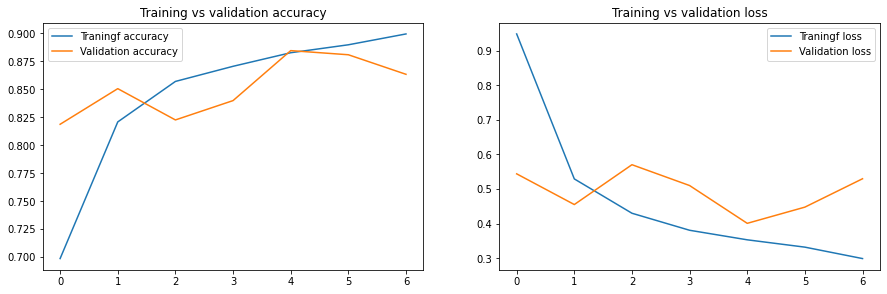

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(accuracy,label='Traningf accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend()
plt.title('Training vs validation accuracy')


plt.subplot(2,2,2)
plt.plot(loss,label='Traningf loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.title('Training vs validation loss')

plt.show()


In [ ]:
classifier.save('/content/drive/MyDrive/Colab Notebooks/lvy pro/classifier.pkl')


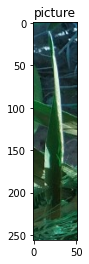

//////////////////////////////////////////////////////////////////////////////////////////////////////////////
Prediction is--  Wheat__Healthy


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

testImage='/content/drive/Othercomputers/My Laptop/dataset-crop-diseases/dataset-top-five-crops/Corn_(maize)___healthy/00031d74-076e-4aef-b040-e068cd3576eb___R.S_HL 8315 copy 2(1).jpg'
test_image=load_img(testImage,target_size=(128,128))
test_image=img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img=cv2.imread(testImage)

plt.imshow(img)
plt.title('picture')
plt.show()

print('///////////'*10)
print('Prediction is-- ',ResultMap[np.argmax(result)])
